In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import pandas as pd
import numpy as np

In [2]:
class region():
    
    def __init__(self, name, default_rating):
        self.name = name
        self.default_rating = default_rating
        self.teams = []

class team():
    
    def __init__(self, name, region, initial_rating=None):
        
        self.name = name

        self.region = region
        if initial_rating:
            self.rating = initial_rating
        else:
            self.rating = region.default_rating
            
        self.game_dates = []
        self.rating_history = []
        
        region.teams.append(self)
            
        print("Added {} to as a team in {}. Their initial ELO is {}.".format(name, 
                                                                        region.name, self.rating))
def date_from_string(x):
    return datetime.datetime(*[int(item) for item in x.split('-')])


def game(winner, loser, date):
    
    date = date_from_string(date)
    
    print("Calculating Elo changes from {}'s victory over {} on {}.".format(winner.name, loser.name, date))
    winner.game_dates.append(date)
    loser.game_dates.append(date)
    
    nwr, nlr = calc_new_ratings(winner.rating, loser.rating)
    print("Game win increased {}'s Elo from {} to {}.".format(winner.name, winner.rating, nwr))
    winner.rating = nwr
    winner.rating_history.append(winner.rating)
    print("Game loss decreased {}'s Elo from {} to {}.".format(loser.name, loser.rating, nlr))
    loser.rating = nlr
    loser.rating_history.append(loser.rating)
    
def calc_new_ratings(r1, r2, k=32):
    '''
    docstring at some point
    '''
    # First, compute transformed ratings for each team
    R1 = 10 ** (r1/400)
    R2 = 10 ** (r2/400)
    
    # Second, comute expected score for each team
    E1 = R1/(R1+R2)
    E2 = R2/(R1+R2)
    
    # Third, set results
    S1 = 1
    S2 = 0
    
    # Fourth, update Elo ratings for each team
    new_r1 = round(r1 + k*(S1-E1))
    new_r2 = round(r2 + k*(S2-E2))
    
    return new_r1, new_r2

In [3]:
# Define teams and regions
## Define regions
EU = region('EU', 1500)
NA = region('NA', 1500)
KR = region('KR', 1600)
## Define teams for each region
### EU teams
FNC = team('Fnatic', EU)
G2 = team('G2 Esports', EU)
SPY = team('Splyce', EU)
VIT = team('Team Vitality', EU)
H2K = team('H2K', EU)
MSF = team('Misfits Gaming', EU)
ROC = team('ROCCAT', EU)
GIA = team('Giants', EU)
S04 = team('FC Schalke 04', EU)
UOL = team('Unicorns of Love', EU)

### NA teams
FOX = team('Echo Fox', NA)
C9 = team('Cloud9', NA)
T100 = team('100 Thieves', NA)
TSM = team('TSM', NA)
CG = team('Clutch Gaming', NA)
TL = team('Team Liquid', NA)
CLG = team('Counter Logic Gaming', NA)
FLY = team('FlyQuest', NA)
OPT = team('OpTic Gaming', NA)
GGS = team('Golden Guardians', NA)

### KR teams
KZ = team('KING-ZONE DragonX', KR)
AFS = team('Afreeca Freecs', KR)
KT = team('kt Rolster', KR)
KSV = team('KSV', KR)
ROX = team('ROX Tigers', KR)
MVP = team('MVP', KR)
JAG = team('Jin Air GreenWings', KR)
SKT = team('SK telecom T1', KR)
BBQ = team('bbq OLIVERS', KR)
KDM = team('KONGDOO MONSTER', KR)

Added Fnatic to as a team in EU. Their initial ELO is 1500.
Added G2 Esports to as a team in EU. Their initial ELO is 1500.
Added Splyce to as a team in EU. Their initial ELO is 1500.
Added Team Vitality to as a team in EU. Their initial ELO is 1500.
Added H2K to as a team in EU. Their initial ELO is 1500.
Added Misfits Gaming to as a team in EU. Their initial ELO is 1500.
Added ROCCAT to as a team in EU. Their initial ELO is 1500.
Added Giants to as a team in EU. Their initial ELO is 1500.
Added FC Schalke 04 to as a team in EU. Their initial ELO is 1500.
Added Unicorns of Love to as a team in EU. Their initial ELO is 1500.
Added Echo Fox to as a team in NA. Their initial ELO is 1500.
Added Cloud9 to as a team in NA. Their initial ELO is 1500.
Added 100 Thieves to as a team in NA. Their initial ELO is 1500.
Added TSM to as a team in NA. Their initial ELO is 1500.
Added Clutch Gaming to as a team in NA. Their initial ELO is 1500.
Added Team Liquid to as a team in NA. Their initial ELO 

In [4]:
# Games
## EU LCS Spring Split 2018 #########################################
### Week 1
game(G2, MSF, '2018-01-19')
game(VIT, H2K, '2018-01-19')
game(GIA, UOL, '2018-01-19')
game(S04, ROC, '2018-01-19')
game(FNC, SPY, '2018-01-19')

game(VIT, GIA, '2018-01-20')
game(SPY, UOL, '2018-01-20')
game(H2K, FNC, '2018-01-20')
game(ROC, G2, '2018-01-20')
game(MSF, S04, '2018-01-20')

### Week 2
game(GIA, G2, '2018-01-26')
game(ROC, SPY, '2018-01-26')
game(MSF, H2K, '2018-01-26')
game(VIT, FNC, '2018-01-26')
game(S04, UOL, '2018-01-26')

game(GIA, H2K, '2018-01-27')
game(ROC, UOL, '2018-01-27')
game(MSF, VIT, '2018-01-27')
game(SPY, S04, '2018-01-27')
game(FNC, G2, '2018-01-27')

### Week 3
game(UOL, H2K, '2018-02-02')
game(GIA, ROC, '2018-02-02')
game(VIT, S04, '2018-02-02')
game(G2, SPY, '2018-02-02')
game(MSF, FNC, '2018-02-02')

game(VIT, UOL, '2018-02-03')
game(S04, GIA, '2018-02-03')
game(FNC, ROC, '2018-02-03')
game(G2, H2K, '2018-02-03')
game(SPY, MSF, '2018-02-03')

### Week 4
game(SPY, H2K, '2018-02-09')
game(VIT, ROC, '2018-02-09')
game(GIA, MSF, '2018-02-09')
game(FNC, UOL, '2018-02-09')
game(G2, S04, '2018-02-09')

game(VIT, SPY, '2018-02-10')
game(S04, H2K, '2018-02-10')
game(ROC, MSF, '2018-02-10')
game(FNC, GIA, '2018-02-10')
game(G2, UOL, '2018-02-10')

### Week 5
game(SPY, GIA, '2018-02-16')
game(H2K, ROC, '2018-02-16')
game(MSF, UOL, '2018-02-16')
game(G2, VIT, '2018-02-16')
game(FNC, S04, '2018-02-16')

game(UOL, GIA, '2018-02-17')
game(H2K, VIT, '2018-02-17')
game(ROC, S04, '2018-02-17')
game(G2, MSF, '2018-02-17')
game(FNC, SPY, '2018-02-17')

### Week 6
game(UOL, SPY, '2018-02-23')
game(G2, ROC, '2018-02-23')
game(FNC, H2K, '2018-02-23')
game(GIA, VIT, '2018-02-23')
game(S04, MSF, '2018-02-23')

game(UOL, ROC, '2018-02-24')
game(H2K, GIA, '2018-02-24')
game(SPY, S04, '2018-02-24')
game(FNC, G2, '2018-02-24')
game(MSF, VIT, '2018-02-24')

### Week 7
game(ROC, GIA, '2018-03-02')
game(UOL, H2K, '2018-03-02')
game(SPY, G2, '2018-03-02')
game(VIT, S04, '2018-03-02')
game(MSF, FNC, '2018-03-02')

game(SPY, ROC, '2018-03-03')
game(UOL, S04, '2018-03-03')
game(H2K, MSF, '2018-03-03')
game(FNC, VIT, '2018-03-03')
game(G2, GIA, '2018-03-03')

### Week 8
game(VIT, UOL, '2018-03-09')
game(S04, GIA, '2018-03-09')
game(SPY, MSF, '2018-03-09')
game(H2K, G2, '2018-03-09')
game(FNC, ROC, '2018-03-09')

game(GIA, MSF, '2018-03-10')
game(SPY, H2K, '2018-03-10')
game(ROC, VIT, '2018-03-10')
game(FNC, UOL, '2018-03-10')
game(S04, G2, '2018-03-10')

### Week 9
game(H2K, S04, '2018-03-16')
game(ROC, MSF, '2018-03-16')
game(VIT, SPY, '2018-03-16')
game(FNC, GIA, '2018-03-16')
game(G2, UOL, '2018-03-16')

game(SPY, GIA, '2018-03-17')
game(H2K, ROC, '2018-03-17')
game(MSF, UOL, '2018-03-17')
game(G2, VIT, '2018-03-17')
game(FNC, S04, '2018-03-17')

game(G2, SPY, '2018-03-17-12-00')

## NA LCS Spring Split 2018 ###################################
### Week 1
game(TL, TSM, '2018-01-20')
game(T100, OPT, '2018-01-20')
game(CG, GGS, '2018-01-20')
game(FOX, FLY, '2018-01-20')
game(C9, CLG, '2018-01-20')

game(TL, OPT, '2018-01-21')
game(FLY, TSM, '2018-01-21')
game(T100, CLG, '2018-01-21')
game(C9, GGS, '2018-01-21')
game(FOX, CG, '2018-01-21')

### Week 2
game(CG, CLG, '2018-01-27')
game(TSM, OPT, '2018-01-27')
game(FOX, C9, '2018-01-27')
game(T100, TL, '2018-01-27')
game(FLY, GGS, '2018-01-27')

game(FOX, TSM, '2018-01-28')
game(C9, T100, '2018-01-28')
game(OPT, FLY, '2018-01-28')
game(CLG, GGS, '2018-01-28')
game(TL, CG, '2018-01-28')

### Week 3
game(CLG, FOX, '2018-02-03')
game(C9, OPT, '2018-02-03')
game(T100, CG, '2018-02-03')
game(TL, FLY, '2018-02-03')
game(TSM, GGS, '2018-02-03')

game(FOX, OPT, '2018-02-04')
game(TSM, T100, '2018-02-04')
game(TL, GGS, '2018-02-04')
game(C9, CG, '2018-02-04')
game(CLG, FLY, '2018-02-04')

### Week 4
game(CG, TSM, '2018-02-10')
game(C9, TL, '2018-02-10')
game(OPT, CLG, '2018-02-10')
game(FLY, T100, '2018-02-10')
game(FOX, GGS, '2018-02-10')

game(C9, FLY, '2018-02-11')
game(GGS, T100, '2018-02-11')
game(TSM, CLG, '2018-02-11')
game(FOX, TL, '2018-02-11')
game(CG, OPT, '2018-02-11')

### Week 5
game(TL, CLG, '2018-02-17')
game(FOX, T100, '2018-02-17')
game(C9, TSM, '2018-02-17')
game(CG, FLY, '2018-02-17')
game(OPT, GGS, '2018-02-17')

game(CG, TSM, '2018-02-18')
game(GGS, TL, '2018-02-18')
game(FOX, C9, '2018-02-18')
game(T100, CLG, '2018-02-18')
game(FLY, OPT, '2018-02-18')

### Week 6
game(T100, C9, '2018-02-24')
game(CG, CLG, '2018-02-24')
game(TSM, FOX, '2018-02-24')
game(OPT, GGS, '2018-02-24')
game(TL, FLY, '2018-02-24')

game(TSM, OPT, '2018-02-25')
game(T100, FLY, '2018-02-25')
game(FOX, TL, '2018-02-25')
game(GGS, CLG, '2018-02-25')
game(C9, CG, '2018-02-25')

### Week 7
game(TL, T100, '2018-03-03')
game(TSM, FLY, '2018-03-03')
game(CLG, C9, '2018-03-03')
game(GGS, FOX, '2018-03-03')
game(CG, OPT, '2018-03-03')

game(CLG, TL, '2018-03-04')
game(FOX, OPT, '2018-03-04')
game(T100, TSM, '2018-03-04')
game(C9, GGS, '2018-03-04')
game(CG, FLY, '2018-03-04')

### Week 8
game(CG, FOX, '2018-03-10')
game(CLG, FLY, '2018-03-10')
game(C9, OPT, '2018-03-10')
game(TSM, TL, '2018-03-10')
game(T100, GGS, '2018-03-10')

game(CLG, FOX, '2018-03-11')
game(FLY, GGS, '2018-03-11')
game(TL, CG, '2018-03-11')
game(TSM, C9, '2018-03-11')
game(T100, OPT, '2018-03-11')

### Week 9
game(T100, CG, '2018-03-17')
game(FOX, FLY, '2018-03-17')
game(TL, C9, '2018-03-17')
game(TSM, GGS, '2018-03-17')
game(OPT, CLG, '2018-03-17')


## LCK Spring Split 2018 #########################################
### Week 1
game(KSV, KZ, '2018-01-16-00-00')
game(KSV, KZ, '2018-01-16-08-00')
game(KDM, MVP, '2018-01-16-00-00')
game(KDM, MVP, '2018-01-16-08-00')

game(AFS, KT, '2018-01-17-00-00')
game(KT, AFS, '2018-01-17-08-00')
game(AFS, KT, '2018-01-17-16-00')
game(SKT, ROX, '2018-01-17-00-00')
game(ROX, SKT, '2018-01-17-08-00')
game(SKT, ROX, '2018-01-17-16-00')

game(BBQ, KDM, '2018-01-18-00-00')
game(KDM, BBQ, '2018-01-18-08-00')
game(BBQ, KDM, '2018-01-18-16-00')
game(KSV, JAG, '2018-01-18-00-00')
game(KSV, JAG, '2018-01-18-08-00')

game(KT, MVP, '2018-01-20-00-00')
game(KT, MVP, '2018-01-20-08-00')
game(JAG, SKT, '2018-01-20-00-00')
game(SKT, JAG, '2018-01-20-08-00')
game(JAG, SKT, '2018-01-20-16-00')

## Week 2
game(KZ, AFS, '2018-01-23-00-00')
game(KZ, AFS, '2018-01-23-08-00')
game(ROX, BBQ, '2018-01-23-00-00')
game(BBQ, ROX, '2018-01-23-08-00')
game(ROX, BBQ, '2018-01-23-16-00')

game(JAG, MVP, '2018-01-24-00-00')
game(JAG, MVP, '2018-01-24-08-00')
game(KT, SKT, '2018-01-24-00-00')
game(SKT, KT, '2018-01-24-08-00')
game(KT, SKT, '2018-01-24-16-00')

game(ROX, KDM, '2018-01-25-00-00')
game(KDM, ROX, '2018-01-25-08-00')
game(ROX, KDM, '2018-01-25-16-00')
game(KSV, AFS, '2018-01-25-00-00')
game(AFS, KSV, '2018-01-25-08-00')
game(KSV, AFS, '2018-01-25-16-00')

game(KZ, SKT, '2018-01-26-00-00')
game(KZ, SKT, '2018-01-26-08-00')
game(KT, BBQ, '2018-01-26-00-00')
game(BBQ, KT, '2018-01-26-08-00')
game(KT, BBQ, '2018-01-26-16-00')

game(KDM, KSV, '2018-01-27-00-00')
game(KDM, KSV, '2018-01-27-08-00')
game(AFS, ROX, '2018-01-27-00-00')
game(AFS, ROX, '2018-01-27-08-00')

game(BBQ, JAG, '2018-01-28-00-00')
game(BBQ, JAG, '2018-01-28-08-00')
game(KZ, MVP, '2018-01-28-00-00')
game(KZ, MVP, '2018-01-28-08-00')

### Week 3
game(KSV, MVP, '2018-01-30-00-00')
game(KSV, MVP, '2018-01-30-08-00')
game(JAG, KDM, '2018-01-30-00-00')
game(JAG, KDM, '2018-01-30-08-00')

game(KZ, ROX, '2018-01-31-00-00')
game(KZ, ROX, '2018-01-31-08-00')
game(AFS, BBQ, '2018-01-31-00-00')
game(AFS, BBQ, '2018-01-31-08-00')

game(KT, JAG, '2018-02-01-00-00')
game(KT, JAG, '2018-02-01-08-00')
game(MVP, SKT, '2018-02-01-00-00')
game(SKT, MVP, '2018-02-01-08-00')
game(MVP, SKT, '2018-02-01-16-00')

game(KZ, KDM, '2018-02-03-00-00')
game(KZ, KDM, '2018-02-03-08-00')
game(KSV, BBQ, '2018-02-03-00-00')
game(BBQ, KSV, '2018-02-03-08-00')
game(KSV, BBQ, '2018-02-03-16-00')

game(KT, ROX, '2018-02-04-00-00')
game(ROX, KT, '2018-02-04-08-00')
game(KT, ROX, '2018-02-04-16-00')
game(AFS, SKT, '2018-02-04-00-00')
game(AFS, SKT, '2018-02-04-08-00')

### Week 4
game(ROX, KSV, '2018-02-06-00-00')
game(KSV, ROX, '2018-02-06-08-00')
game(ROX, KSV, '2018-02-06-16-00')
game(AFS, KDM, '2018-02-06-00-00')
game(AFS, KDM, '2018-02-06-08-00')

game(SKT, BBQ, '2018-02-07-00-00')
game(BBQ, SKT, '2018-02-07-08-00')
game(SKT, BBQ, '2018-02-07-16-00')
game(KZ, KT, '2018-02-07-00-00')
game(KZ, KT, '2018-02-07-08-00')

game(AFS, MVP, '2018-02-08-00-00')
game(AFS, MVP, '2018-02-08-08-00')
game(ROX, JAG, '2018-02-08-00-00')
game(JAG, ROX, '2018-02-08-08-00')
game(ROX, JAG, '2018-02-08-16-00')

game(KZ, JAG, '2018-02-10-00-00')
game(KZ, JAG, '2018-02-10-08-00')
game(MVP, BBQ, '2018-02-10-00-00')
game(MVP, BBQ, '2018-02-10-08-00')

game(SKT, KSV, '2018-02-11-00-00')
game(SKT, KSV, '2018-02-11-08-00')
game(KT, KDM, '2018-02-11-00-00')
game(KT, KDM, '2018-02-11-08-00')

### Week 5
game(SKT, KSV, '2018-02-20-00-00')
game(KDM, SKT, '2018-02-20-08-00')
game(SKT, KSV, '2018-02-20-16-00')
game(KT, KSV, '2018-02-20-00-00')
game(KT, KSV, '2018-02-20-08-00')

game(JAG, AFS, '2018-02-21-00-00')
game(JAG, AFS, '2018-02-21-08-00')
game(ROX, MVP, '2018-02-21-00-00')
game(ROX, MVP, '2018-02-21-08-00')

game(BBQ, KZ, '2018-02-22-00-00')
game(KZ, BBQ, '2018-02-22-08-00')
game(BBQ, KZ, '2018-02-22-16-00')
game(KSV, KDM, '2018-02-22-00-00')
game(KSV, KDM, '2018-02-22-08-00')

game(SKT, ROX, '2018-02-24-00-00')
game(SKT, ROX, '2018-02-24-08-00')
game(KZ, AFS, '2018-02-24-00-00')
game(AFS, KZ, '2018-02-24-08-00')
game(KZ, AFS, '2018-02-24-16-00')

game(KT, JAG, '2018-02-25-00-00')
game(JAG, KT, '2018-02-25-08-00')
game(KT, JAG, '2018-02-25-16-00')
game(MVP, BBQ, '2018-02-25-00-00')
game(MVP, BBQ, '2018-02-25-08-00')

### Week 6
game(AFS, KSV, '2018-02-27-00-00')
game(AFS, KSV, '2018-02-27-08-00')
game(ROX, KT, '2018-02-27-00-00')
game(ROX, KT, '2018-02-27-08-00')

game(BBQ, JAG, '2018-02-28-00-00')
game(BBQ, JAG, '2018-02-28-08-00')
game(KZ, MVP, '2018-02-28-00-00')
game(KZ, MVP, '2018-02-28-08-00')

game(AFS, SKT, '2018-03-01-00-00')
game(SKT, AFS, '2018-03-01-08-00')
game(AFS, SKT, '2018-03-01-16-00')
game(KT, KDM, '2018-03-01-00-00')
game(KT, KDM, '2018-03-01-08-00')

game(KZ, KDM, '2018-03-03-00-00')
game(KZ, KDM, '2018-03-03-08-00')
game(ROX, BBQ, '2018-03-03-00-00')
game(ROX, BBQ, '2018-03-03-08-00')

game(SKT, JAG, '2018-03-04-00-00')
game(JAG, SKT, '2018-03-04-08-00')
game(SKT, JAG, '2018-03-04-16-00')
game(MVP, KSV, '2018-03-04-00-00')
game(KSV, MVP, '2018-03-04-08-00')
game(MVP, KSV, '2018-03-04-16-00')

### Week 7
game(KZ, SKT, '2018-03-06-00-00')
game(KZ, SKT, '2018-03-06-08-00')
game(MVP, ROX, '2018-03-06-00-00')
game(MVP, ROX, '2018-03-06-08-00')

game(JAG, KDM, '2018-03-07-00-00')
game(JAG, KDM, '2018-03-07-08-00')
game(KSV, BBQ, '2018-03-07-00-00')
game(KSV, BBQ, '2018-03-07-08-00')

game(KT, SKT, '2018-03-08-00-00')
game(KT, SKT, '2018-03-08-08-00')
game(AFS, ROX, '2018-03-08-00-00')
game(AFS, ROX, '2018-03-08-08-00')

game(JAG, MVP, '2018-03-10-00-00')
game(MVP, JAG, '2018-03-10-08-00')
game(JAG, MVP, '2018-03-10-16-00')
game(KSV, KT, '2018-03-10-00-00')
game(KT, KSV, '2018-03-10-08-00')
game(KSV, KT, '2018-03-10-16-00')

game(AFS, KDM, '2018-03-11-00-00')
game(AFS, KDM, '2018-03-11-08-00')
game(KZ, BBQ, '2018-03-11-00-00')
game(KZ, BBQ, '2018-03-11-08-00')

### Week 8
game(KZ, ROX, '2018-03-13-00-00')
game(ROX, KZ, '2018-03-13-08-00')
game(KZ, ROX, '2018-03-13-16-00')
game(KSV, JAG, '2018-03-13-00-00')
game(JAG, KSV, '2018-03-13-08-00')
game(KSV, JAG, '2018-03-13-16-00')

game(MVP, KDM, '2018-03-14-00-00')
game(KDM, MVP, '2018-03-14-08-00')
game(MVP, KDM, '2018-03-14-16-00')
game(BBQ, SKT, '2018-03-14-00-00')
game(SKT, BBQ, '2018-03-14-08-00')
game(BBQ, SKT, '2018-03-14-16-00')

game(AFS, JAG, '2018-03-15-00-00')
game(JAG, AFS, '2018-03-15-08-00')
game(AFS, JAG, '2018-03-15-16-00')
game(KZ, KT, '2018-03-15-00-00')
game(KZ, KT, '2018-03-15-08-00')

game(AFS, MVP, '2018-03-17-00-00')
game(AFS, MVP, '2018-03-17-08-00')
game(KT, BBQ, '2018-03-17-00-00')
game(BBQ, KT, '2018-03-17-08-00')
game(KT, BBQ, '2018-03-17-16-00')

Calculating Elo changes from G2 Esports's victory over Misfits Gaming on 2018-01-19 00:00:00.
Game win increased G2 Esports's Elo from 1500 to 1516.
Game loss decreased Misfits Gaming's Elo from 1500 to 1484.
Calculating Elo changes from Team Vitality's victory over H2K on 2018-01-19 00:00:00.
Game win increased Team Vitality's Elo from 1500 to 1516.
Game loss decreased H2K's Elo from 1500 to 1484.
Calculating Elo changes from Giants's victory over Unicorns of Love on 2018-01-19 00:00:00.
Game win increased Giants's Elo from 1500 to 1516.
Game loss decreased Unicorns of Love's Elo from 1500 to 1484.
Calculating Elo changes from FC Schalke 04's victory over ROCCAT on 2018-01-19 00:00:00.
Game win increased FC Schalke 04's Elo from 1500 to 1516.
Game loss decreased ROCCAT's Elo from 1500 to 1484.
Calculating Elo changes from Fnatic's victory over Splyce on 2018-01-19 00:00:00.
Game win increased Fnatic's Elo from 1500 to 1516.
Game loss decreased Splyce's Elo from 1500 to 1484.
Calculati

In [5]:
# Current ratings
## EU
print("EU Elo-ratings:")
for team in EU.teams:
    print("{}:\t{}".format(team.name, team.rating))
    
## NA
print("\nNA Elo-ratings:")
for team in NA.teams:
    print("{}:\t{}".format(team.name, team.rating))
    
## KR
print("\nKR Elo-ratings:")
for team in KR.teams:
    print("{}:\t{}".format(team.name, team.rating))

EU Elo-ratings:
Fnatic:	1625
G2 Esports:	1559
Splyce:	1537
Team Vitality:	1506
H2K:	1504
Misfits Gaming:	1466
ROCCAT:	1476
Giants:	1437
FC Schalke 04:	1451
Unicorns of Love:	1439

NA Elo-ratings:
Echo Fox:	1559
Cloud9:	1540
100 Thieves:	1563
TSM:	1552
Clutch Gaming:	1536
Team Liquid:	1534
Counter Logic Gaming:	1470
FlyQuest:	1414
OpTic Gaming:	1427
Golden Guardians:	1405

KR Elo-ratings:
KING-ZONE DragonX:	1791
Afreeca Freecs:	1734
kt Rolster:	1641
KSV:	1603
ROX Tigers:	1596
MVP:	1544
Jin Air GreenWings:	1578
SK telecom T1:	1549
bbq OLIVERS:	1518
KONGDOO MONSTER:	1446


In [6]:
color_by = { FNC: '#FFA300',
             G2:  '#808080',
             SPY: '#EEBB00',
             VIT: '#FFD700',
             H2K: '#1464F4',
             MSF: '#CD0000',
             ROC: '#1E90FF',
             GIA: '#5190ED',
             S04: '#3A5FCD',
             UOL: '#FF007F',
             FOX: '#E47833',
             C9: '#63D1F4',
             T100: '#FF2400',
             TSM: '#202020',
             CG: '#EE3B3B',
             TL: '#808080',
             CLG: '#37FDFC',
             FLY: '#329555',
             OPT: '#83F52C',
             GGS: '#FFE303',
             KZ: '#3A5FCD',
             AFS: '#0BB5FF',
             KT: '#FF0000',
             KSV: '#FCD116',
             ROX: '#FF8C00',
             MVP: '#0EBFE9',
             JAG: '#ADFF2F',
             SKT: '#FC1501',
             BBQ: '#686868',
             KDM: '#108070'
           }

def plot_ratings(regions, highlight_teams=None):
    
    if highlight_teams == []:
        highlight_teams = None
    
    fig = plt.figure(facecolor='w')
    fig.set_size_inches(12.5, 8.5)
    ax = fig.add_subplot(111, facecolor='#F5F5F5', axisbelow=True)

    for region in regions:
        for team in region.teams:
            if highlight_teams != None:
                if team in highlight_teams:
                    ax.plot(np.array(team.game_dates), np.array(team.rating_history),
                           c=color_by[team], alpha=1, lw=1, label=team.name)
                else:
                    ax.plot(np.array(team.game_dates), np.array(team.rating_history),
                           c='#BEBEBE', alpha=0.5, lw=.75)
            else:
                ax.plot(np.array(team.game_dates), np.array(team.rating_history),
                           c=color_by[team], alpha=1, lw=1, label=team.name)

    ax.set_xlabel('Date')
    ax.set_ylabel('Elo-rating')
#     ax.set_ylim(1400, 1700)
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
#     legend = ax.legend(handles=[S_patch, I_patch, R_patch])
#     legend.get_frame().set_alpha(0.5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.xticks(rotation=90)
    plt.show()
    


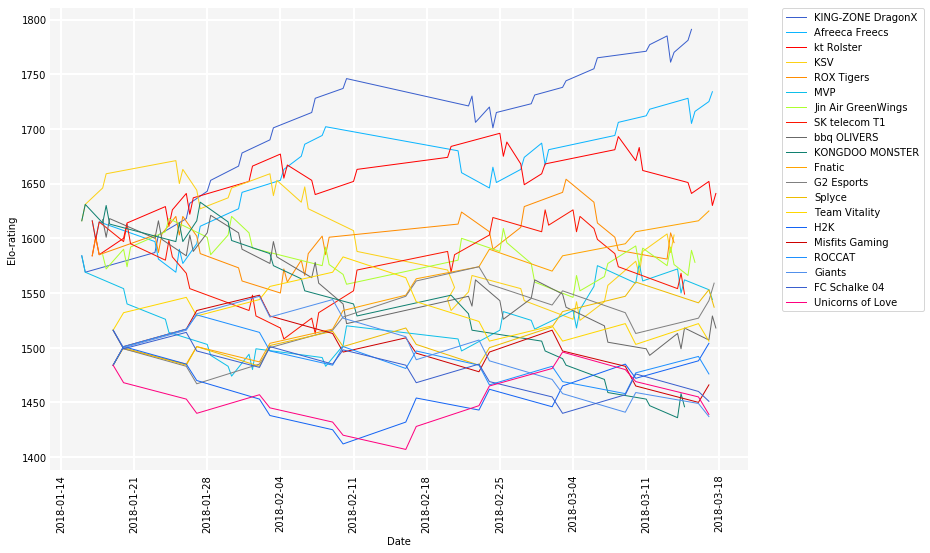

In [9]:
plot_ratings([KR, EU])